In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
input_data = np.arange(0, np.pi*2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data - np.pi) / np.pi#-1.0 ~ 1.0
n_data = len(correct_data)

In [41]:
n_in = 1
n_mid = 4
n_out = 1

In [34]:
wb_width = 0.01
eta = 0.1
epoch = 2001
interval = 200

In [35]:
class MiddleLayer: #은닉층 설계
    def __init__ (self,n_upper, n): #n_upper : 입력의 수, n : 출력의 수
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    #순전파    
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1+np.exp(-u))
        
    #역전파    
    def backward(self, grad_y):
        delta = grad_y * (1-self.y) * self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [36]:
class OutputLayer:    
    def __init__(self, n_upper, n):  #n_upper : 입력의 수, n : 출력의 수
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
    
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u
        
    def backward(self, t):
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta)
        self.grad_x = np.dot(delta, self.w.T)
            
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [37]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

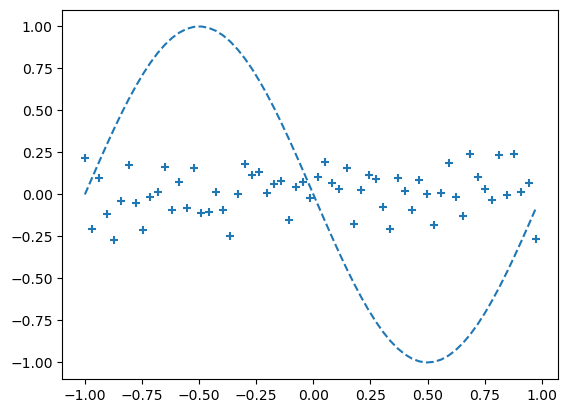

Epoch:0/2001 Error:0.2678498086004388


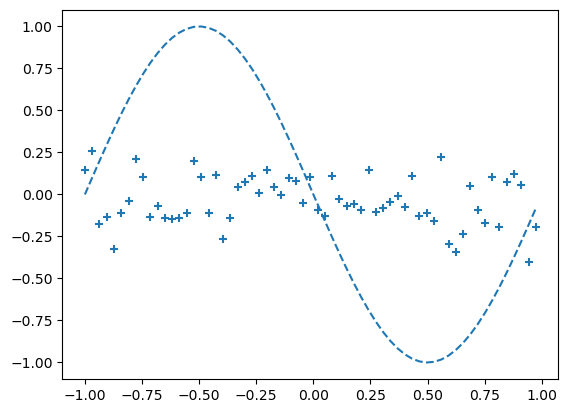

Epoch:200/2001 Error:0.24626289660676376


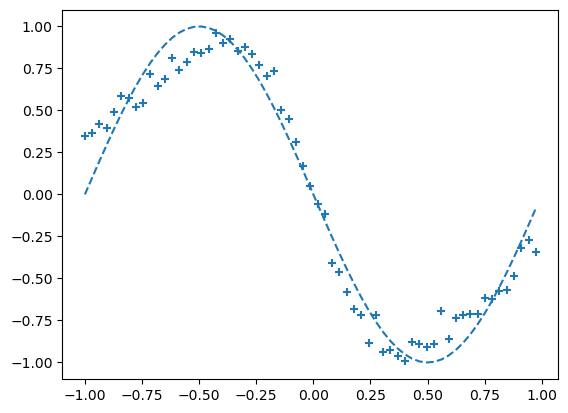

Epoch:400/2001 Error:0.009170195545450207


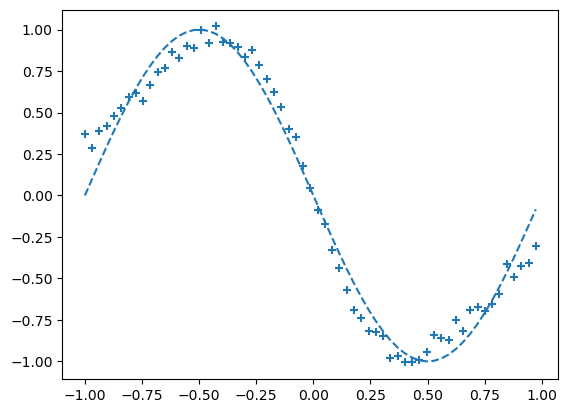

Epoch:600/2001 Error:0.006311885658800406


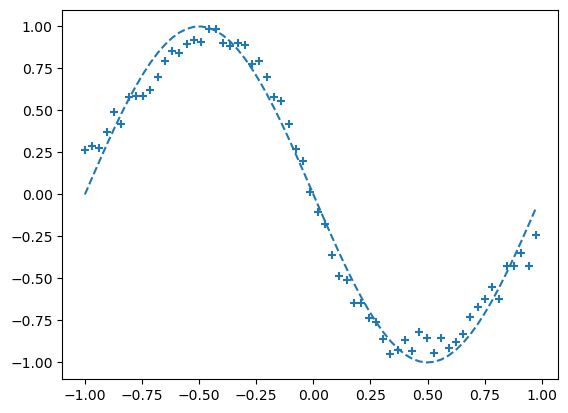

Epoch:800/2001 Error:0.004820318132378251


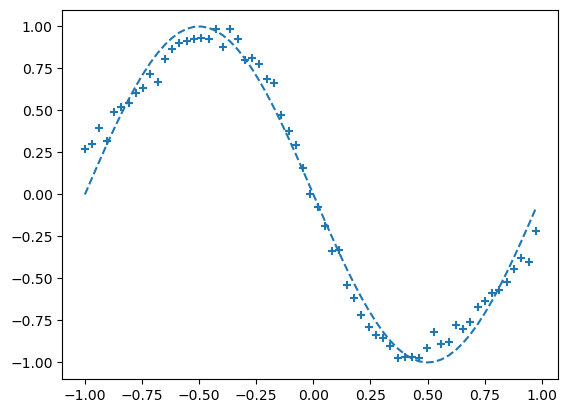

Epoch:1000/2001 Error:0.004440884545010057


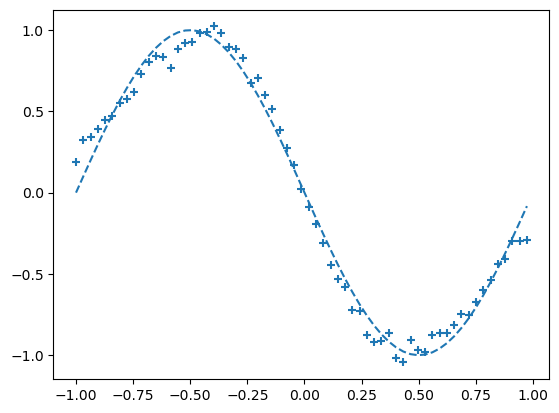

Epoch:1200/2001 Error:0.0035684909695584874


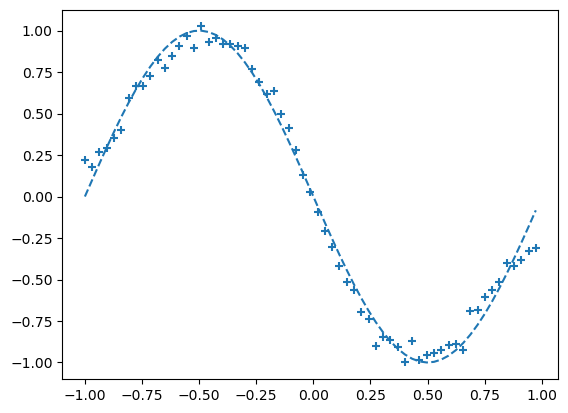

Epoch:1400/2001 Error:0.002874001844168779


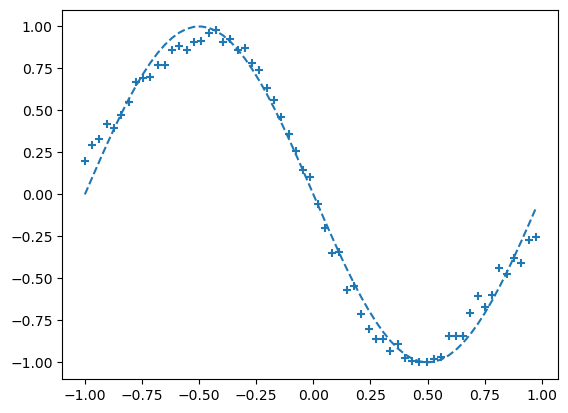

Epoch:1600/2001 Error:0.0032109073001712397


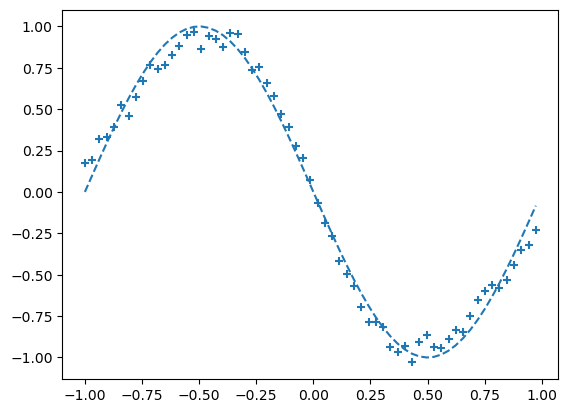

Epoch:1800/2001 Error:0.0028959417439631207


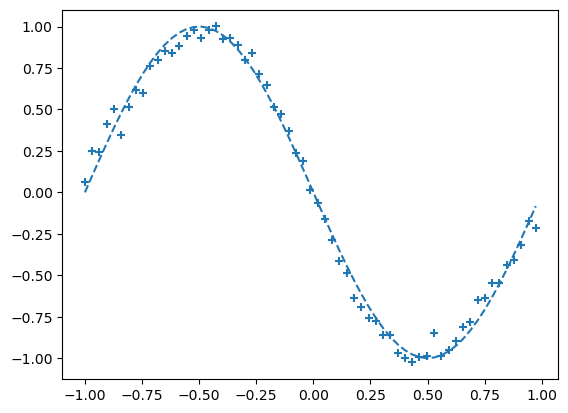

Epoch:2000/2001 Error:0.0020338966783806514


In [43]:
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx]
        
        middle_layer.forward(x.reshape(1, 1))
        output_layer.forward(middle_layer.y)
        
        
        output_layer.backward(t.reshape(1, 1))
        middle_layer.backward(output_layer.grad_x )
        
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1)
            total_error += 1.0 / 2.0 * np.sum(np.square(y - t))
            
            plot_x.append(x)
            plot_y.append(y)
            
            
    if i%interval == 0:
        
        # 출력 그래프 표시
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        # 에포크 수와 오차 표시
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))